In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager._rebuild()
matplotlib.rcParams['font.family'] = ['Heiti TC']
import seaborn as sns
from scipy import stats
import numpy as np

In [3]:
pd.set_option('display.max_colwidth', 1000)

## Read in csv

In [4]:
dfSroted = pd.read_csv('./dataframes/firstStage_train_updatedDatetime_clean.csv') 

In [5]:
len(dfSroted)

1328584

In [6]:
dfSroted.columns.values

array(['fact', 'lawArticle', 'accusation', 'moneyPunishment',
       'criminalName', 'deathPenalty', 'imprisonment', 'lifeImprisonment',
       'dateTime', 'province_CN', 'province_EN', 'city_CN', 'city_EN',
       'County_CN'], dtype=object)

In [8]:
dfAccuProv2 = pd.read_csv('./dataframes/province_crime.csv', encoding='utf-8')
# dfAccuProv2 = dfAccuProv2.drop(columns=['Unnamed: 0'])

In [10]:
# dfAccuProv2

In [11]:
# dfAccuProv2.to_csv('./dataframes/province_crime.csv', encoding='utf_8_sig', index=False)

In [12]:
df_totalCrimeCountSorted = pd.read_csv('./dataframes/totalCrimeCountSorted.csv')
df_totalCrimeCountSorted.columns = ['accusation', 'count']

In [13]:
df_totalCrimeCountSorted.set_index('accusation', inplace=True)

In [15]:
df_totalCrimeCountSorted.head(20)

,count
accusation,
盗窃,298611
危险驾驶,265231
故意伤害,144930
交通肇事,118900
走私、贩卖、运输、制造毒品,101735
容留他人吸毒,42598
诈骗,38356
寻衅滋事,24712
抢劫,20568


## National

<ipython-input-129-8df0cc6570e8>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(df_totalCrimeCountSorted, labels=df_totalCrimeCountSorted.index.values.tolist(), autopct='%1.0f%%')


([<matplotlib.patches.Wedge at 0x119422310>,
 [Text(0.8369875792408563, 0.7137589174199727, '盗窃'),
  Text(-0.49677673889346835, 0.9814340893276384, '危险驾驶'),
  Text(-1.0903803021122007, 0.14515783397979554, '故意伤害'),
  Text(-0.9697837058301298, -0.5191527365875869, '交通肇事'),
  Text(-0.5820381378837524, -0.93339788196075, '走私、贩卖、运输、制造毒品'),
  Text(-0.23605481735565959, -1.074373363036885, '容留他人吸毒'),
  Text(-0.027334636669409253, -1.0996603192068684, '诈骗'),
  Text(0.13635574957936114, -1.0915159685303053, '寻衅滋事'),
  Text(0.2522202108237265, -1.0706936841375478, '抢劫'),
  Text(0.342889694484655, -1.0451921629137009, '信用卡诈骗'),
  Text(0.4176885230309054, -1.0176130392876563, '妨害公务'),
  Text(0.48844150796829994, -0.9856088946908167, '非法持有毒品'),
  Text(0.5516059742151049, -0.9516989278181441, '非法持有、私藏枪支、弹药'),
  Text(0.607461878422157, -0.9170551053583555, '开设赌场'),
  Text(0.6536245901894295, -0.8847456669007769, '受贿'),
  Text(0.6908225025204274, -0.8560165126978652, '掩饰、隐瞒犯罪所得、犯罪所得收益'),
  Text(0.724

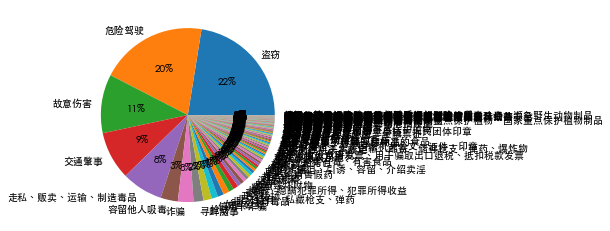

In [129]:
plt.pie(df_totalCrimeCountSorted, labels=df_totalCrimeCountSorted.index.values.tolist(), autopct='%1.0f%%')


## XinJiang crimes in Top and Bottom percentail

In [15]:
xinjiang = dfAccuProv2.loc[dfAccuProv2['province'] == 'Xinjiang']

In [16]:
len(xinjiang)

1

In [17]:
xinjiang = xinjiang.transpose()
xinjiang.columns = ['count']
xinjiang = xinjiang.drop(['province'])

In [18]:
xinjiangSorted = xinjiang.sort_values(by='count', ascending=False)

In [19]:
len(xinjiangSorted)

195

In [130]:
# xinjiangSorted.to_csv('./dataframes/xinjinagCrimes.csv', encoding='utf_8_sig')

<ipython-input-96-2ffa743f819b>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(xinjiangSorted, labels=xinjiangSorted.index.values.tolist(), autopct='%1.0f%%')


([<matplotlib.patches.Wedge at 0x11865bdc0>,
 [Text(0.4889557345338485, 0.9853538905725521, '危险驾驶'),
  Text(-1.0255369228408358, 0.39783667489329066, '盗窃'),
  Text(-0.9599580183859384, -0.5371039032966922, '故意伤害'),
  Text(-0.462888728599089, -0.9978647327849196, '交通肇事'),
  Text(0.10982790316106845, -1.0945034635336899, '走私、贩卖、运输、制造毒品'),
  Text(0.4661649688184821, -0.9963384072926547, '诈骗'),
  Text(0.6029561990865138, -0.9200238159869257, '非法持有毒品'),
  Text(0.6706974368788042, -0.8718743878358869, '信用卡诈骗'),
  Text(0.7210604669396656, -0.8307056055045926, '合同诈骗'),
  Text(0.7614368370902991, -0.7938601533783651, '妨害公务'),
  Text(0.796825107179832, -0.7583335338542331, '受贿'),
  Text(0.8284805210445735, -0.7236159383607523, '抢劫'),
  Text(0.8574937908499558, -0.6889879524736063, '容留他人吸毒'),
  Text(0.8834483821515272, -0.6553769572344218, '贪污'),
  Text(0.9073207141881476, -0.621907647167254, '行贿'),
  Text(0.9287171427317586, -0.5894781325852202, '寻衅滋事'),
  Text(0.94781054945868, -0.5582608371853

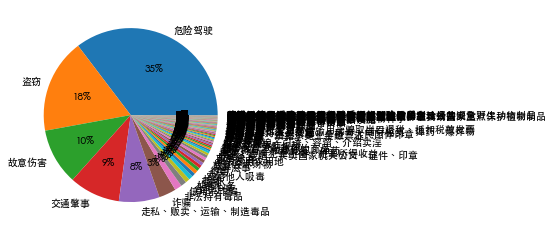

In [96]:
plt.pie(xinjiangSorted, labels=xinjiangSorted.index.values.tolist(), autopct='%1.0f%%')

In [21]:
xinjiangSorted

,count
危险驾驶,2703
盗窃,1342
故意伤害,801
交通肇事,724
走私、贩卖、运输、制造毒品,577
...,...
盗掘古文化遗址、古墓葬,0
非法捕捞水产品,0
重大劳动安全事故,0
过失以危险方法危害公共安全,0


## Tibet Top and Bottom Crimes 

In [132]:
xizang = dfAccuProv2.loc[dfAccuProv2['province'] == 'Xizang']

In [133]:
xizang = xizang.transpose()
xizang.columns = ['count']
xizang = xizang.drop(['province'])

In [135]:
# xizang

In [136]:
xizangSorted = xizang.sort_values(by='count', ascending=False)

In [137]:
xizangSorted

,count
盗窃,329
走私、贩卖、运输、制造毒品,235
故意伤害,143
交通肇事,59
危险驾驶,56
...,...
扰乱无线电通讯管理秩序,0
窃取、收买、非法提供信用卡信息,0
假冒注册商标,0
侵占,0


In [138]:
xizangSorted.to_csv('./dataframes/tibetCrimesCountSorted.csv', encoding='utf_8_sig')

<ipython-input-139-3b0ab73afd4e>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(xizangSorted, labels=xizangSorted.index.values.tolist(), autopct='%1.0f%%')


([<matplotlib.patches.Wedge at 0x1199ddee0>,
 [Text(0.6528726123709825, 0.885300712761426, '盗窃'),
  Text(-0.9061696654961654, 0.6235836249730808, '走私、贩卖、运输、制造毒品'),
  Text(-0.979751923006047, -0.500086161942073, '故意伤害'),
  Text(-0.5509024188930421, -0.9521063621559281, '交通肇事'),
  Text(-0.21594097376594523, -1.0785960763181996, '危险驾驶'),
  Text(0.057829965115446864, -1.0984788095975027, '抢劫'),
  Text(0.23125156913875616, -1.075417459301672, '诈骗'),
  Text(0.3665734700287001, -1.037122891016835, '非法持有毒品'),
  Text(0.4649589708565378, -0.9969017782209184, '贪污'),
  Text(0.5373129658778656, -0.9598410163665292, '非法持有、私藏枪支、弹药'),
  Text(0.6041212704074632, -0.9192592075368475, '受贿'),
  Text(0.6628982382550732, -0.8778188456158368, '合同诈骗'),
  Text(0.7140956821928847, -0.836700278877376, '非法收购、运输盗伐、滥伐的林木'),
  Text(0.7582292575700242, -0.7969243332743768, '职务侵占'),
  Text(0.7980016252772951, -0.7570953744772158, '故意杀人'),
  Text(0.8336475776378374, -0.7176571021724554, '抢夺'),
  Text(0.8634855887983316

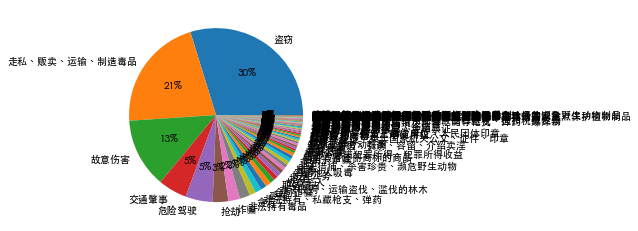

In [139]:
plt.pie(xizangSorted, labels=xizangSorted.index.values.tolist(), autopct='%1.0f%%')

## National "dangerous driving" cases

In [336]:
nationalDDDrive133 = dfSroted[(dfSroted['accusation'] == '危险驾驶') & (dfSroted['lawArticle']==133)] 

In [163]:
nationalDDrive = dfSroted[dfSroted['accusation'] == '危险驾驶']

In [378]:
len(nationalDDrive)

265231

In [381]:
# nationalDDrive.to_csv('./dataframes/dangerousDriving/nationalDD.csv', index=False)

In [380]:
len(dfSroted)

1328584

In [379]:
len(nationalDDDrive133)

264517

## Xinjiang "dangerous driving" cases 

In [269]:
xinjiangDDrive = dfSroted[dfSroted['accusation'] == '危险驾驶']
xinjiangDDrive=xinjiangDDrive[xinjiangDDrive['province_EN'] == 'Xinjiang']

In [382]:
# len(xinjiangDDrive)

2703

In [383]:
# xinjiangDDrive.to_csv('./dataframes/dangerousDriving/xinjiangDD.csv', index=False)

## "Dangerous Driving" analysis - feature statistics

### National

In [166]:
nationalDDrive.columns.values

array(['fact', 'lawArticle', 'accusation', 'moneyPunishment',
       'criminalName', 'deathPenalty', 'imprisonment', 'lifeImprisonment',
       'dateTime', 'province_CN', 'province_EN', 'city_CN', 'city_EN',
       'County_CN'], dtype=object)

In [180]:
len(nationalDDrive)

265231

In [349]:
print('national dangerous drive AVG money punishment: {}'.format(nationalDDDrive133['moneyPunishment'].mean()))
print('national dangerous drive MEDIEN money punishment: {}'.format(nationalDDDrive133['moneyPunishment'].median()))
print('national dangerous drive AVG imprisonment {} month'.format(nationalDDDrive133['imprisonment'].mean()))
print('national dangerous drive MEDIEN imprisonment {} month'.format(nationalDDDrive133['imprisonment'].median()))

print('national dangerous drive death panelty: {}%'.format(len(nationalDDDrive133[nationalDDDrive133['deathPenalty']==True])/len(nationalDDrive)))
print('national dangerous life Imprisonment penalty: {}%'.format(len(nationalDDDrive133[nationalDDDrive133['lifeImprisonment']==True])/len(nationalDDrive)))



national dangerous drive AVG money punishment: 6943.310263612547
national dangerous drive MEDIEN money punishment: 2000.0
national dangerous drive AVG imprisonment 2.064831371896702 month
national dangerous drive MEDIEN imprisonment 2.0 month
national dangerous drive death panelty: 7.540596687415875e-06%
national dangerous life Imprisonment penalty: 0.0%


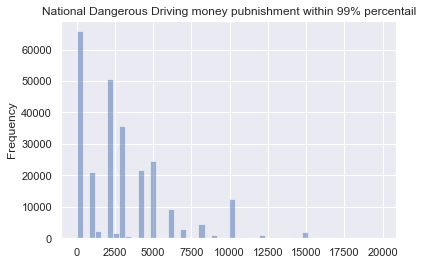

In [339]:
# Only plot data within 99% percentail of money pubnishment
nationalMoney99P = nationalDDDrive133['moneyPunishment'][nationalDDDrive133['moneyPunishment'] < nationalDDDrive133['moneyPunishment'].quantile(.99)]
nationalMoney99P.plot.hist(bins=50, alpha=0.5, title='National Dangerous Driving money pubnishment within 99% percentail')


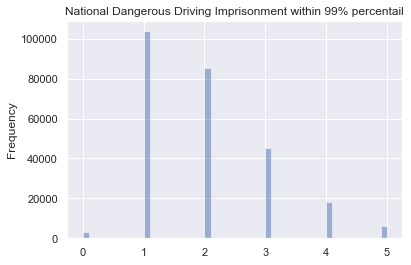

In [340]:
# Only plot data within 99% percentail of imprisonment
nationalPrison99P = nationalDDDrive133['imprisonment'][nationalDDDrive133['imprisonment'] < nationalDDDrive133['imprisonment'].quantile(.99)]
nationalPrison99P.plot.hist(bins=50, alpha=0.5, title='National Dangerous Driving Imprisonment within 99% percentail')


In [248]:
nationalDDrive['imprisonment'].max()

198

In [341]:
nationalDDPrisondf = nationalDDDrive133['imprisonment'].value_counts(normalize=True).to_frame()

In [342]:
nationalDDPrisondf.columns=['percentage']
nationalDDPrisondf['imprisonmentMonth'] = nationalDDPrisondf.index

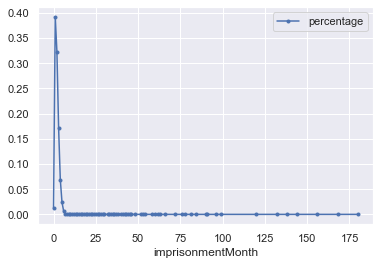

In [343]:
nationalDDPrisondfSorted = nationalDDPrisondf.sort_values(by='imprisonmentMonth') # dict doesn't preserve order
nationalDDPrisondfSorted.plot(x='imprisonmentMonth', y='percentage', marker='.')

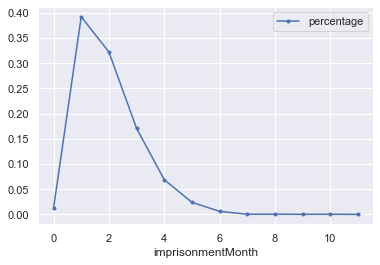

In [344]:
nationalDDPrisondfoneyear= nationalDDPrisondfSorted[nationalDDPrisondfSorted['imprisonmentMonth']< 12]
nationalDDPrisondfoneyear.plot(x='imprisonmentMonth', y='percentage', marker='.')

### Xinjiang

In [183]:
len(xinjiangDDrive)

2703

In [350]:
print('Xinjiang dangerous drive AVG money punishment: {}'.format(xinjiangDDrive['moneyPunishment'].mean()))
print('Xinjiang dangerous drive MEDIEN money punishment: {}'.format(xinjiangDDrive['moneyPunishment'].median()))
print('Xinjiang dangerous drive AVG imprisonment {} month'.format(xinjiangDDrive['imprisonment'].mean()))
print('Xinjiang dangerous drive MEDIEN imprisonment {} month'.format(xinjiangDDrive['imprisonment'].median()))
print('Xinjiang dangerous drive death panelty: {}%'.format(len(xinjiangDDrive[xinjiangDDrive['deathPenalty']==True])/len(xinjiangDDrive)))
print('Xinjiang dangerous life Imprisonment penalty: {}%'.format(len(xinjiangDDrive[xinjiangDDrive['lifeImprisonment']==True])/len(xinjiangDDrive)))



Xinjiang dangerous drive AVG money punishment: 2076.9515353311135
Xinjiang dangerous drive MEDIEN money punishment: 0.0
Xinjiang dangerous drive AVG imprisonment 2.5952645209027008 month
Xinjiang dangerous drive MEDIEN imprisonment 2.0 month
Xinjiang dangerous drive death panelty: 0.0%
Xinjiang dangerous life Imprisonment penalty: 0.0%


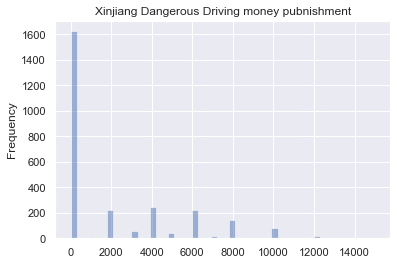

In [245]:
# Plot Xinjiang money punishment
# xinjiangMoney99P = xinjiangDDrive['moneyPunishment'][xinjiangDDrive['moneyPunishment'] < xinjiangDDrive['moneyPunishment'].quantile(.99)]
xinjiangDDrive['moneyPunishment'].plot.hist(bins=50, alpha=0.5, title='Xinjiang Dangerous Driving money pubnishment')


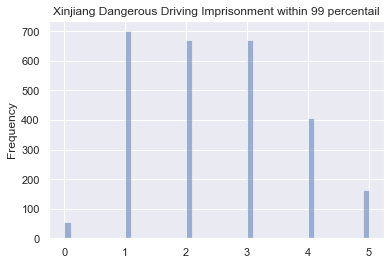

In [247]:
# Plot Xinjiang imprisonment punishment
xinjiangPrison99P = xinjiangDDrive['imprisonment'][xinjiangDDrive['imprisonment'] < xinjiangDDrive['imprisonment'].quantile(.99)]

# xinjiangDDrive['imprisonment'].plot.hist(bins=50, alpha=0.5, title='Xinjiang Dangerous Driving Imprisonment')
xinjiangPrison99P.plot.hist(bins=50, alpha=0.5, title='Xinjiang Dangerous Driving Imprisonment within 99 percentail')


In [267]:
xinjiangDDrive['imprisonment'].max()

132

In [288]:
XinjiangDDPrisondf = xinjiangDDrive['imprisonment'].value_counts(normalize=True).to_frame()

In [289]:
XinjiangDDPrisondf.columns=['percentage']
XinjiangDDPrisondf['imprisonmentMonth'] = XinjiangDDPrisondf.index

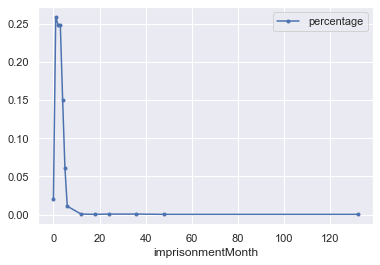

In [290]:
XinjiangDDPrisondfSorted = XinjiangDDPrisondf.sort_values(by='imprisonmentMonth') # dict doesn't preserve order
XinjiangDDPrisondfSorted.plot(x='imprisonmentMonth', y='percentage', marker='.')

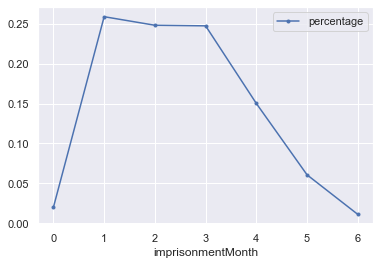

In [291]:
XinjiangDDPrisondfoneyear= XinjiangDDPrisondfSorted[XinjiangDDPrisondfSorted['imprisonmentMonth']< 12]
XinjiangDDPrisondfoneyear.plot(x='imprisonmentMonth', y='percentage', marker='.')

### Combined graphs

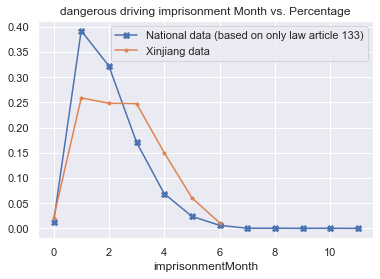

In [347]:
# Imprisonment
ax=nationalDDPrisondfoneyear.plot(x='imprisonmentMonth', y='percentage', marker='X')
XinjiangDDPrisondfoneyear.plot(x='imprisonmentMonth', y='percentage', marker='.', ax=ax, title='dangerous driving imprisonment Month vs. Percentage')
ax.legend(["National data (based on only law article 133)", "Xinjiang data"]);



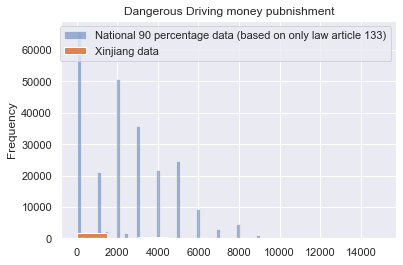

In [348]:
# Money punishment
nationalMoney90P = nationalDDDrive133['moneyPunishment'][nationalDDDrive133['moneyPunishment'] < nationalDDDrive133['moneyPunishment'].quantile(.90)]

ax=nationalMoney95P.plot.hist(bins=50, alpha=0.5)
xinjiangDDrive['moneyPunishment'].plot.hist(ax=ax, title='Dangerous Driving money pubnishment')
ax.legend(["National 90 percentage data (based on only law article 133)", "Xinjiang data"]);



## Manual random read through "dangerous driving" cases

In [317]:
pd.set_option('display.max_colwidth', 500)

### National data

In [331]:
nationalDDrive.groupby(['lawArticle']).agg(['count'])

,fact,accusation,moneyPunishment,criminalName,deathPenalty,imprisonment,lifeImprisonment,dateTime,province_CN,province_EN,city_CN,city_EN,County_CN
,count,count,count,count,count,count,count,count,count,count,count,count,count
lawArticle,,,,,,,,,,,,,
124,1,1,1,1,1,1,1,1,1,1,1,1,1
128,1,1,1,1,1,1,1,1,1,1,1,1,1
130,32,32,32,32,32,32,32,32,32,32,32,32,32
132,1,1,1,1,1,1,1,1,1,1,1,1,1
133,264517,264517,264517,264517,264517,264517,264517,264517,264517,264517,264517,264517,264517
144,1,1,1,1,1,1,1,1,1,1,1,1,1
149,1,1,1,1,1,1,1,1,1,1,1,1,1
150,1,1,1,1,1,1,1,1,1,1,1,1,1


In [357]:
nationalDDrive[nationalDDrive['lawArticle'] == 144][['fact']]

,fact
1084501,舟山市定海区人民检察院指控：舟山市新城福泉食品加工厂主要生产长寿伊面牌空心面。2012年6月初到8月初，作为该厂生产运作负责人及食品化验员的被告人戴某明知不得在食品中随意添加和滥用食品添加剂，为了增加面条劲道，在未对添加物质进行检验确定成分和备案的情况下，在空心面和面的生产过程中添加及要求生产人员添加白色物质。经检验，在抽检的空心面中含有硼砂，且含量超过1000mg／kg。2013年6月19日凌晨，戴某饮酒后驾驶牌号为浙A×××××的中型普通客车，沿舟山市定海区芙蓉洲路由北往南行驶。0时41分，途经芙蓉洲路与解放东路交叉路口的新华书店门口路段时，被值勤民警拦住检查。民警在现场调查过程中发现戴某有酒后驾驶机动车的犯罪嫌疑，经对戴某进行酒精呼气测试，其酒精含量为113mg／100ml。后经舟山市公安局物证鉴定所鉴定：戴某血液中乙醇含量为93.8mg／100ml，已经达到醉酒国家标准。公诉机关以被告人的供述、证人证言、书证、鉴定意见、勘验、检查笔录、视听资料等证据证明上述事实。根据《中华人民共和国刑法》××之规定，应当以生产有毒、有害食品罪追究被告人戴某的刑事责任。戴某犯罪以后自动投...


In [367]:
nationalImprison3month = nationalDDrive[(nationalDDrive['imprisonment']) == 3]



In [368]:
len(nationalImprison3month)

45204

In [377]:
# nationalImprison3month.sample()
nationalImprison3month.sample()[['fact']]

,fact
615053,北海市银海区人民检察院指控：\r\n2016年1月30日2时许，被告人马某酒后驾驶车牌号桂Ａ×××××号小型轿车从北海市银海区福成镇端田村委会朱砂岭村37号其家中出发，行驶至银海区北铁一级公路高速路口往铁山港方向20米处时，因车辆发生故障违停在路中央被交警查获。经检验，马某血液中乙醇含量为134mg／100ml，属醉酒驾驶。上述事实，被告人马某在开庭审理过程中无异议，且有1.受案登记表、立案决定书、当事人血样提取登记表、酒精测试结果单、查获经过、户籍证明等书证；2.被告人马某的供述与辩解；3.鉴定委托书；4.现场查获照片及视听资料等证据证实，足以认定。


### Xinjiang data

In [332]:
xinjiangDDrive.groupby(['lawArticle']).agg(['count'])

,fact,accusation,moneyPunishment,criminalName,deathPenalty,imprisonment,lifeImprisonment,dateTime,province_CN,province_EN,city_CN,city_EN,County_CN
,count,count,count,count,count,count,count,count,count,count,count,count,count
lawArticle,,,,,,,,,,,,,
133,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701
205,1,1,1,1,1,1,1,1,1,1,1,1,1
275,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
经审理查明：2017年4月12日20时10分许，被告人张某醉酒后驾驶×××号普通正三轮摩托车由东向西行驶至新源县建设街与则新路交叉路口时，被新源县交警大队民警当场查获。2017年4月25日经新疆中业司法鉴定所血液酒精检测司法鉴定意见书鉴定：在送检的张某的血液中检出酒精成分，其酒精含量为170.82mg/100ml，属于醉酒驾驶。\r\n上述事实，被告人张某在开庭审理过程中亦无异议，表示认罪，请求从轻处罚，且有受案登记表、立案决定书、检查笔录、常住人口查询证明、酒精检测报告、现场勘查笔录及图片、被告人供述等证据证实，足以认定。